# COGS 118A - Final Project

# <div align="center">Reassessing The Role of Serum Cholesterol Level <br> As A Risk Factor For Heart Disease</div>

## Group members

- Sang Tran
- Tej Nair
- Angel Olivas
- Stanley Sisson

# Table of Contents
* [Abstract](#section1)
* [Backgound](#section2)
* [Problem Statement](#section3)
* [Data](#section4)
* [Proposed Solution](#section5)
* [Evaluation Metrics](#section6)
* [Results](#section7)
    * [Data Cleaning, Pre-Processing and EDA](#section_7_1)
    * [Model Selection](#section_7_2)
    * [Base Model With Voting Classifier](#section_7_3)
    * [Hyperparameter Optimization With Random Search For Each Individual Classifier](#section_7_4)
    * [Tuned Model With Voting Classifier](#section_7_5)
    * [Accuracy Report For The Tuned Classifiers](#section_7_6)
    * [Base and Tuned Model Classification Report](#section_7_7)
    * [Benchmark Models Comparison](#section_7_8)
    * [Hypothesis Testing](#section_7_9)
    
* [Dicussion](#section8)
    * [Interpreting the result](#section_8_1)
    * [Limitations](#section_8_2)
    * [Ethics & Privacy](#section_8_3)
    * [Conclusion](#section_8_4)
* [Footnotes](#section9)          

## Abstract<a id='section1'></a>  
  Heart disease is the primary cause of death, and studying it is crucial for prevention and effective treatment. Identifying risk factors is essential, but it is difficult to pinpoint the exact ones when it comes to aging-related health problems. Although it has been widely believed that serum cholesterol level in the blood is one of the first attributes doctors should look at to predict one's chances of having cardiovascular diseases, recent studies suggests a different position. This study aimed to develop a new model predicting the presence of heart disease in patients using the binary classification label UCI heart disease dataset obtained from 1988. A voting classifier, whose estimators consist of logistic regression, support vector machine, k-nearest neighbors, random forest, adaboost, and xgboost, was used. Random search cross validations for the best hyper-parameters of the individual classifier were conducted, and a finalized tuned model with a voting classifier performance was compared to first the base model with a voting classifier and then the benchmark models. The performance evaluation metrics used are accuracy, recall, and precision. The study hypothesized that our final model with the exclusion of the cholesterol variable would produce similar performance scores on all three metrics. However, contrary to expectations, our findings indicate that the model performed worse than the benchmark models without the cholesterol variable. The accuracy and recall scores were negatively impacted.

## Background<a id='section2'></a>

Cholesterol is an essential lipid found in our body and in all of human body's cells. Human body needs cholesterol to make hormones, vitamin D, and substances that aid digestion. Ever since first study on correlation between serum cholesterol level in the blood and cardiovascular disease was published in 1986 <a name="clark"></a>[<sup>[1]</sup>](#clarknote), a widely adopted views by physicians and currrent literatures that high levels of cholesterol increase one's risk of heart disease, and stroke. The two main types of cholesterol are LDL (which are usually considered bad cholesterol in the literature) and HDL (good cholesterol). LDL cholesterol is found to be associated with an increased risk of heart disease and other health problems, while HDL cholesterol is associated with a decreased risk of such health complications. Other types of cholesterol include triglycerides and very low-density lipoprotein (VLDL) cholesterol. Triglycerides and LDL (low-density lipoprotein) are both types of lipids, or fats, found in the bloodstream. The main difference between the two is their composition and the way they are transported in the body. Triacylglycerols, which consist of three fatty acids, are the main form of fat stored in cells and are usually derived from dietary sources. LDL particles are composed of a core of cholesterol and a combination of triglycerides, phospholipids, and proteins. They play an important role in transporting cholesterol from the liver to other parts of the body. LDL cholesterol is transported from the liver to cells throughout the body and helps the body convert dietary fat into energy for the cells, thus when physicians warn patients of elevated levels of cholesterol, they usually mean high levels LDL.

Into the early 2020s, with the rise of adoption of different dietary lifestyles such as ketogenic diet, carnivore diet and many variants between the two. The traditionally held belief on correlation between blood cholesterol level and heart disease has been challenged. A study in 2020 shows that low carbohydrate diets, which consists mainly animal fats or plant fats , in fact has a beneficial effect on cardiovascular risk factors <a name="dong"></a>[<sup>[2]</sup>](#dongnote). In this particular area of research, it takes a lot of time, effort and money to carry out longitudial study. With the astronomical increase in research papers published every year, we are in a replication crisis <a name="wiki"></a>[<sup>[3]</sup>](#wikipedia) and as noted by many intellectuals in the 21st century, this topic has been explored and discussed in great depth in the POS Medicine journal article  explaining why most of studies' findings are not reliable <a name="ioannidis"></a>[<sup>[4]</sup>](#ioannidisjpa).

In terms of dietary cholesterol, a paper <a name="soliman"></a>[<sup>[5]</sup>](#solimannote) in 2018 concluded that dietary cholesterol does not increase heart disease risk in healthy individuals, but saturated fatty acids and trans-fats do. The inter-presence between cholesterol and saturated fatty acids in food may have led to the misconception that dietary cholesterol is harmful. This still implicitly suggests the current view is correct that physicians still should keep blood cholesterol levels in people that are not healthy in check, and in essense, does not explain when such readings will give insightful interpretation because definition of a "healthy" person can be varied by different physicians.

In terms of serum cholesterol levels, although there are many subcatergories and types of cholesterol, current concensus on which one is the culprit has been recently debated and the one that gains most attention is LDL-C, low density lipoprotein cholesterol, which is considered very bad because it is hypothesized by many that they easily get into any blood vessels due to its low density structures. However, recent finding in 2022 <a name="rcsi"></a>[<sup>[6]</sup>](#rcsinote) found that there is a very weak link in predicting cardiovascular disease based on LDL-C.  

There are several limitations to the studies in this area of research. One that is worth noting is the number of observations can be very scarce because people do not have their lipid profile done annually until their doctors think that they show heart disease related symtoms. Replication from a different population should be conducted to generalize results, which can be time consuming and needs a lot of funding. 

Two best previous works on finding best classification model on the same dataset both shows about 90% accuracy and recall on average. Bhat's work <a name="Bhat"></a>[<sup>[7]</sup>](#Bhatnote) uses ensembling method for the best three out of seven classifiers used to finalize the model while Rutecki <a name="Rutecki"></a>[<sup>[8]</sup>](#Rutecki) uses voting classifier that comprises of ten estimators, which also produces about similar scores for both soft and hard voting. These two models will be used as benchmark models to evaluate the performance of our finalized model. If our hypothesis is correct, we should expect our model to achieve similar results. In other words, our model should yield similar scores in its predictive power compared to the benchmark models, without factoring in serum blood cholesterol level.     

## Problem Statement<a id='section3'></a>

In the face of overwhelmingly contradictory findings from the literature in medicine and nutrition, two questions can be raised: first, whether dietary fats have an influence on blood serum cholesterol levels, since most of the time the number one lifestyle advice physicians give to patients with elevated levels is to stay away from foods that are high in saturated fats; second, whether the cholesterol level in the blood is a good predictor of one's risk of heart disease. The former question should only be taken seriously if there is indeed a positive correlation between blood serum cholesterol level and heart disease.

The hypothesis that this paper will attempt to test is that the serum cholesterol level in the blood is not a significantly strong predictor of the presence of heart disease in patients in our dataset. That is to say that we will attempt to find the best model by leaving out the serum cholesterol level feature while keeping the rest to classify the labels. We will use the tuned combination of logistic regression, support vector machine, random forest, k-nearest neighbors, adaboost, and xgboost for our voting classifier.     

By providing results from this hypothesis test, we can contribute to the reconsideration of the interpretation of blood serum cholesterol as a risk factor for heart disease. This hypothesis can be reproduced and replicated by those who have access to our dataset, which is available for free online. <a name="uci"></a>[<sup>[9]</sup>](#ucidata). 

## Data<a id='section4'></a> 
In the original heart disease dataset <a name="uci"></a>[<sup>[9]</sup>](#ucidata) from UCI archive, it contains 76 attributes, but all published ML experiments refer to only processed Cleveland data and they use a subset of 14 attributes. Thus, in order for us to compare our model with others, we will use the same dataset, which contains 303 observations and 14 variables. Each observation consists of age (numerical), sex (catergorical), chest pain type (catergorical), resting blood pressure (numerical), serum cholestoral (numerical), fasting blood sugar (numerical), resting electrocardiographic results (catergorical), maximum heart rate achieved (numerical), exercise induced angina (catergorical), oldpeak (numerical), the slope of the peak exercise ST segment (catergorical), number of major vessels (catergorical), thal (catergorical), target (catergorical).

The experiments conducted on the Cleveland database have focused on distinguishing between the presence (values 1, 2, 3, 4) and absence (value 0) of heart disease. Therefore, we will convert all integer values under our target column to 1 if the value is not 0. 

Some EDA and preprocessing that we will do: 
- check and drop duplicates 
- check missing values/wrong entries 
- check if variance of any feature column equals to 0 
- drop cholesterol column 
- change the each column name for readability
- evaluate data using heatmaps for missing values and correlation 
- check numerical outliers and apply appropiate methods to deal with observations containing such outliers if necessary
- check target balances. <br> <br>

Dataset Attributes:
- Age (age; in years)
- Sex (sex; 1: Male; 0: Female)
- ChestPainType (cp or chest pain type; 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
- RestingBP (trestbps or resting blood pressure measured in mm Hg on admission to the hospital)
- Cholesterol (chol or serum cholestoral measured in mg/dl)
- FastingBS (fbs or fasting blood sugar, measured in mg/dl; 1: if > 120 mg/dl, 0: otherwise)
- RestingECG (restecg or resting electrocardiographic results; 0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria) 
- MaxHR (thalach or maximum heart rate achieved; numeric value between 60 and 202)
- ExerciseAngina (exang or exercise induced angina; 1: Yes, 0: No)
- Oldpeak (ST depression induced by exercise relative to rest, numeric value measured in depression) 
- ST_Slope (slope or the slope of the peak exercise ST segment, 1: upsloping, 2: flat, 3: downsloping) 
- N_MajorVessels (ca or number of major vessels colored by flourosopy; values: 0-3)
- Thal (thal; 3 = normal; 6 = fixed defect; 7 = reversable defect)
- HeartDisease (num or diagnosis of heart disease (angiographic disease status); Value 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing)

# Proposed Solution<a id='section5'></a>

To address the problem at hand, we suggest utilizing a voting classifier to predict the presence of heart disease in a patient while excluding the cholesterol feature. The outcomes from our model will be compared to the accuracy, recall, and precision scores of the two benchmark models, as previously discussed. Additionally, we will perform three hypothesis tests using the t-student statistic, with a significance level of 0.05, to determine whether we should reject the null hypothesises that the average accuracy, average precision, and the average of our model are the same as that of the benchmark models. Our assumptions are that the average accuracy, average precision, and the average recall are the population means.

To build our classifier, we will utilize a combination of logistic regression, support vector machine, random forest, k-nearest neighbors, adaboost, and xgboost. Given that we are dealing with multiple classifiers, we will employ a random search to identify the best set of hyper-parameters within the search space instead of an exhaustive search. The number of iterations used for each random search will be determined by our assumption about our hardware capacity and the runtime of each classifier, with the main goal of returning the optimal model. 

Reasons for choosing the aforementioned estimators are as follows: logistic regression is used to classify binary labels as probability, support vector machine is effective in high-dimensional feature spaces, k-nearest neighbors is appropriate to use since we prioritize high accuracy, and the other classifiers (random forest, adaboost, and xgboost) are more accurate when it comes to classifying labels with a combination of numerical and categorical features or purely numeric features. Given the limited number of observations, we will use repeated k-fold cross-validation on recall with a default k-value of 5 to evaluate the model's ability to predict new data. Since heart attacks are life-threatening events, false negatives should be penalized in this context, thus it is sensible for us to also compare average recall scores. We will employ random search CV to search for the best set of hyperparameters for each classifier passed to the voting classifier based on the arguments allowed by the scikit-learn library. 

Hyperparameters to tune: solver, penalty and C for logistic regression classifier, kernel, gamma and C for support vector classifier, n_estimators, criterion, max_depth, max_features, min_samples_split, min_sample_leaf, and bootstrap for random forest classifier, n_neighbors, weights, algorithm, leaf_size, and p for K-Nearest Neighborhood, n_estimators, and learning_rate for Adaboost (keep default estimator to be decision tree classifier), and colsample_bytree, reg_alpha and reg_lambda for xgboost. 

Libraries will be used are scikit-learn, xgboost, pandas, numpy, matplotlib, and seaborn. All the machine learning algorithms will be called via scikit-learn library.<br>
Functions needed to call the algorithms:<br>
- sklearn.linear_model.LogisticRegression()<br>
- sklearn.svm.SVC()<br>
- sklearn.neighbors.KNeighborsClassifier()<br>
- sklearn.ensemble.RandomForestClassifier()<br>
- sklearn.ensemble.AdaBoostClassifier()<br>
- xgboost.XGBClassifier()<br>
- sklearn.ensemble.VotingClassifier()<br>

We will use train-test-split for model selection with test size of 0.2 and keep default values for individual estimators for the base model. Then we will use random search for best hyper-parameters for each estimator. We expect our tuned model to perform better than the base, and thus will compare with the benchmark models, whose statistics are described below.

The benchmark models statistics:<br>
- By Bhat:<br>

_accuracy1  : 91.8%<br>
_precision1 : 91.4%<br>
_recall1    : 94.1%<br> 
<br>

- By Rutecki:<br>

Hard Voting:<br> 
_accuracy2  : 89.7%<br>
_precision2 : 89.6%<br>
_recall2    : 92.0%<br>
<br>
Soft Voting:<br> 
_accuracy3  : 90.8%<br>
_precision3 : 91.4%<br> 
_recall3   : 92.0%<br> 

Average Accuracy  = 90.7%<br> 
Average Precision = 90.8%<br> 
Average Recall    = 92.7%<br> 

## Evaluation Metrics<a id='section6'></a>

We will use accuracy, recall, precision scores to compare the models. Making use of built in functions in scikit-learn library to compute confusion matrix, number of true poitives (TP), true negatives (TN), false positives (FP) and false negatives (FN).

- A true positive (TP) prediction is a prediction where the model correctly identifies a positive instance. For example, in our heart disease diagnosis, a true positive prediction would mean that the model correctly diagnoses the presence of heart disease in a patient as positive.

- A true negative (TN) prediction is a prediction where the model correctly identifies a negative instance. For example, in our heart disease diagnosis, a true negative prediction would mean that the model correctly diagnoses the presence of heart disease in a patient as negative.

- A false positive (FP) prediction is a prediction where the model incorrectly identifies a negative instance as positive. For example, in our heart disease diagnosis, a false positive prediction would mean that the model diagnoses a patient without heart disease as positive.

- A false negative (FN) prediction is a prediction where the model incorrectly identifies a positive instance as negative. For example, in our heart disease diagnosis, a false positive prediction would mean that the model diagnoses a patient with heart disease as negative.

The mathematical equations for accuracy, recall, precision are expressed as follows:<br><br>
 $$Accuracy=\frac{TN + TP}{TP + TN + FP + FN}$$<br>
 $$Precision=\frac{TP}{TP + FP}$$<br>
 $$Recall=\frac{TP}{TP + FN}$$<br>

The accuracy metric is commonly used in machine learning to evaluate the performance of a classification model. It measures the proportion of correctly classified instances out of the total number of instances. Accuracy is a useful metric when the classes are balanced, meaning they have approximately the same number of instances. In this case, accuracy can provide a clear and straightforward measure of the model's overall performance.

In predicting heart disease in patients, both false positive and false negative predictions can be costly, but they have different implications. 
- A false positive prediction in heart disease diagnosis means that a person is diagnosed with the disease even though they do not have it. This can lead to unnecessary treatment, which can be expensive, invasive, and potentially harmful to the patient. It can also cause psychological distress for the patient and their family. 
- A false negative prediction means that a person is diagnosed as not having the disease, even though they actually do. This can delay necessary treatment, leading to the progression of the disease and potentially worse outcomes. It can also cause the patient and their family to underestimate the severity of the condition, which can lead to a lack of follow-up or treatment.

Overall, false negative predictions can be more costly in the long term, as they can lead to more severe health consequences. However, false positive predictions can also have negative consequences and should be minimized in clinical practice. When comparing machine learning models, it is essential to consider both precision and recall metrics, as they provide different types of information about the model's performance.

- Precision measures the proportion of true positives among the instances predicted as positive. In the context of heart disease diagnosis, precision would indicate the proportion of patients who are correctly diagnosed with the disease among those who are diagnosed as positive. High precision means that the model is correctly identifying those who truly have the disease, but it may miss some patients who have the disease. 

- Recall, on the other hand, measures the proportion of true positives among all the actual positive instances. In the context of heart disease diagnosis, recall would indicate the proportion of patients who are correctly diagnosed with the disease among all patients who have the disease. High recall means that the model is correctly identifying most of the patients who have the disease, but it may also include some patients who do not have the disease.

Therefore, in the case of heart disease diagnosis, accuracy, precision and recall are essential metrics to consider. High precision is crucial to avoid unnecessary treatments and false positives, while high recall is important to identify most of the patients who have the disease and avoid false negatives. Accuracy measures the proportion of correct predictions made by the model, or the percentage of cases in which the model correctly identifies the presence or absence of heart disease.



## Results<a id='section7'></a>

### Data Cleaning, Pre-Processing and EDA<a id='section_7_1'></a>

##### Load Data, Change Column Names, And Drop Cholesterol Column

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

rawdata = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
                      names = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG",
                               "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "N_MajorVessels", "Thal", "HeartDisease"])
data = rawdata
data = data.drop(columns=['Cholesterol'])

##### Change target values to 1s and 0s

In [2]:
data["HeartDisease"].unique()

array([0, 2, 1, 3, 4])

In [3]:
data["HeartDisease"] = data.HeartDisease.apply(lambda x: 1 if x != 0 else x)
data["HeartDisease"].unique()

array([0, 1])

##### Delete Duplicates and Reset Index

In [4]:
data = data.drop_duplicates(keep='first')
data = data.reset_index(drop=True)

##### Detect And Drop Rows With Missing Values (NaN) or Wrong Entries Like Symbols -,?,#,*,etc.  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    float64
 1   Sex             303 non-null    float64
 2   ChestPainType   303 non-null    float64
 3   RestingBP       303 non-null    float64
 4   FastingBS       303 non-null    float64
 5   RestingECG      303 non-null    float64
 6   MaxHR           303 non-null    float64
 7   ExerciseAngina  303 non-null    float64
 8   Oldpeak         303 non-null    float64
 9   ST_Slope        303 non-null    float64
 10  N_MajorVessels  303 non-null    object 
 11  Thal            303 non-null    object 
 12  HeartDisease    303 non-null    int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 30.9+ KB


Dtype for N_MajorVessels and Thal Columns is object, which suggests that these columns also contain symbols other than numerical values. 

In [6]:
for col in data.iloc[:,10:12]:
    print('{} : {}'.format(col,data[col].unique()))

N_MajorVessels : ['0.0' '3.0' '2.0' '1.0' '?']
Thal : ['6.0' '3.0' '7.0' '?']


In [7]:
import numpy as np

for col in data.iloc[:,10:12]:
    data[col].replace({'?':np.nan},inplace=True)

In [8]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
N_MajorVessels    4
Thal              2
HeartDisease      0
dtype: int64

<AxesSubplot:>

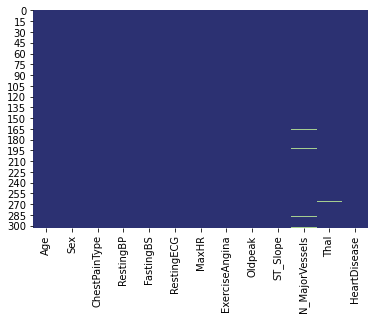

In [9]:
import seaborn as sns

sns.heatmap(data.isnull(), cbar=False, cmap='crest_r')

Since our dataset is small and the missing values in each obervation do not overlap, it is not ideal to delete such observations. They might contain valuable information in other features which can be important for our ML models' prediction.   

##### Replacing the missing values

In [10]:
for col in data.iloc[:,10:12]:
    data[col]=pd.to_numeric(data[col])
    data[col].fillna(data[col].mean(), inplace=True)

##### Check Target Balances

In [11]:
from collections import Counter

print(data['HeartDisease'].unique())
Counter(data['HeartDisease'])

[0 1]


Counter({0: 164, 1: 139})

With the number of observations of target label 0 not significatly different to that of target label 1 (ratio about 1 to 1.18), we will not have to worry about imbalanced data issues for this dataset.

##### Correlation Heatmap

<AxesSubplot:>

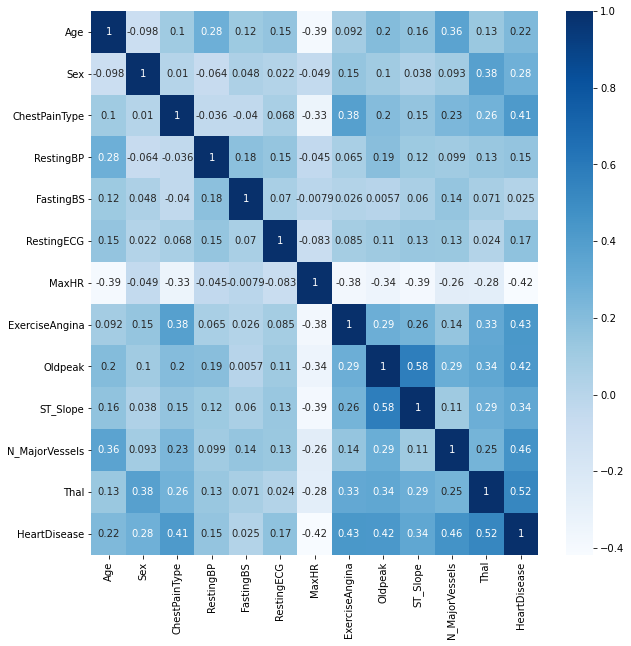

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

From the correlation heatmap above, we can see that most of the variables selected by researchers have very weak correlations with heart disease. For the purpose of this paper, we do not need to do feature selection but rather keep all the features for our models to learn. However, outliers should be treated since they can have a negative impact on our models' predictions.

##### Checking For Numerical Outliers 

In [13]:
numerical_columns = list(data.loc[:,['Age', 'RestingBP', 'MaxHR', 'Oldpeak']])

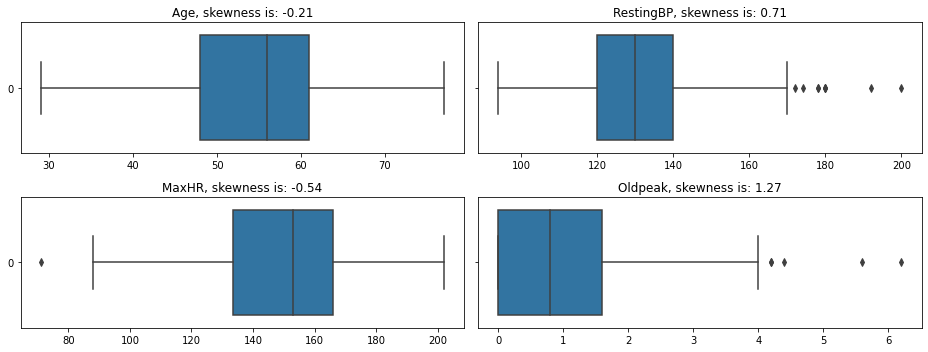

In [14]:
def boxplots_disp(dataset, data_col_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    axs = axs.flatten()
    for i, data in enumerate(data_col_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_disp(data, numerical_columns, 2, 2)
plt.tight_layout()

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

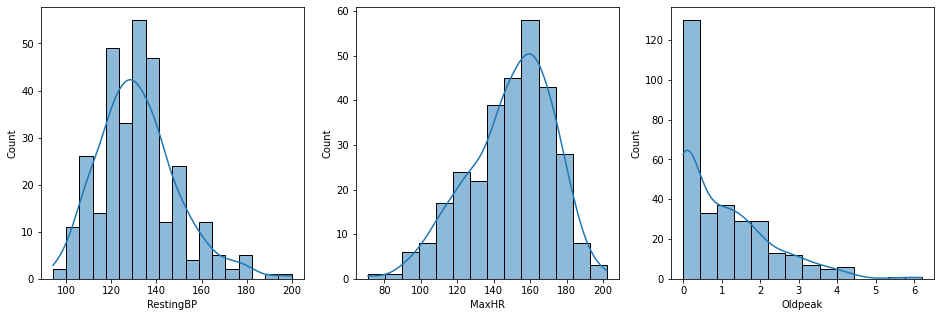

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(data[numerical_columns[1]], kde=True)

plt.subplot(1,3,2)
sns.histplot(data[numerical_columns[2]], kde=True)

plt.subplot(1,3,3)
sns.histplot(data[numerical_columns[3]], kde=True)                

In [16]:
data[numerical_columns[1:4]].describe()

,RestingBP,MaxHR,Oldpeak
count,303.000000,303.000000,303.000000
mean,131.689769,149.607261,1.039604
std,17.599748,22.875003,1.161075
min,94.000000,71.000000,0.000000
25%,120.000000,133.500000,0.000000
50%,130.000000,153.000000,0.800000
75%,140.000000,166.000000,1.600000
max,200.000000,202.000000,6.200000


RestingBP, MaxHR, and Oldpeak seem to have outliers. Given our small dataset, we should use capping method to deal with these observations. 

##### Compute IQR, Lower Limit and Upper Limit

In [17]:
percentile = np.empty((2, 3))
for i in range(3):
    percentile[0,i]= data[numerical_columns[i+1]].quantile(0.25)
    percentile[1,i] = data[numerical_columns[i+1]].quantile(0.75)
iqr = percentile[1,:] - percentile[0,:]
for i in range(3):
    print (numerical_columns[i+1] + ":\n     Lower Limit %.2f, Upper Limit %.2f, IQR %.2f" 
           % (percentile[0,i]-1.5*iqr[i],iqr[i],percentile[1,i]+1.5*iqr[i]))

RestingBP:
     Lower Limit 90.00, Upper Limit 20.00, IQR 170.00
MaxHR:
     Lower Limit 84.75, Upper Limit 32.50, IQR 214.75
Oldpeak:
     Lower Limit -2.40, Upper Limit 1.60, IQR 4.00


##### Capping Outliers

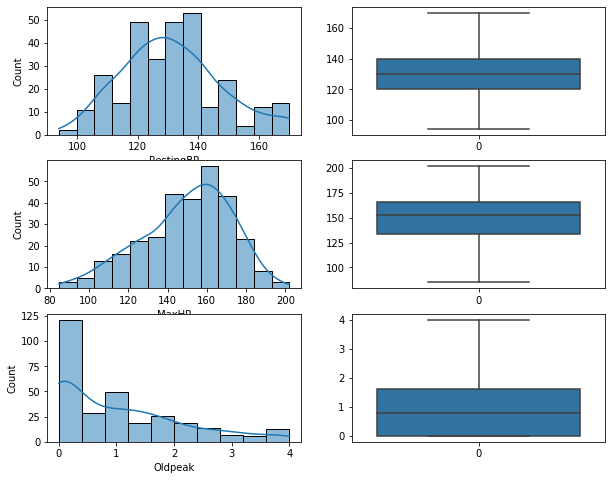

In [18]:
new_data_cap = data.copy()
plt.figure(figsize=(10,8))
for i in range(3):
    lower_limit_RestingBP = percentile[0,i]-1.5*iqr[i]
    upper_limit_RestingBP = percentile[1,i]+1.5*iqr[i]
    new_data_cap[numerical_columns[i+1]] = np.where(new_data_cap[numerical_columns[i+1]] > upper_limit_RestingBP, 
                                              upper_limit_RestingBP,
                                              np.where(new_data_cap[numerical_columns[i+1]] < lower_limit_RestingBP,
                                                       lower_limit_RestingBP,
                                                       new_data_cap[numerical_columns[i+1]]
                                                      )
                                             )
    plt.subplot(3,2,2*i+1)
    sns.histplot(new_data_cap[numerical_columns[i+1]], kde=True)
    plt.subplot(3,2,2*i+2)
    sns.boxplot(data = new_data_cap[numerical_columns[i+1]])

##### Check variance
Features that have very little difference or diversity in the data do not contribute any useful information for an ML model to learn patterns. If a feature has the same value (e.g., 2) for every observations in a dataset, it is considered a constant feature and does not provide any significant value. It is important to remove such features from the dataset.

In [19]:
assert new_data_cap.var().any() > 0.0

### Model Selection<a id='section_7_2'></a>

#### Model Preparation

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = new_data_cap["HeartDisease"]
X = new_data_cap.drop('HeartDisease',axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Check Target Balances In The Training Set

In [22]:
Counter(y_train)

Counter({1: 113, 0: 129})

In [23]:
#!pip install xgboost
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### Base Model With Voting Classifier<a id='section_7_3'></a>

In [24]:
estimator = [('LogisticRegression', LogisticRegression()), ('RandomForest', RandomForestClassifier()), 
             ('SVC', SVC(probability = True)), ('KNN', KNeighborsClassifier()),
             ('AdaBoostClassifier', AdaBoostClassifier()), ('XGB', XGBClassifier())]

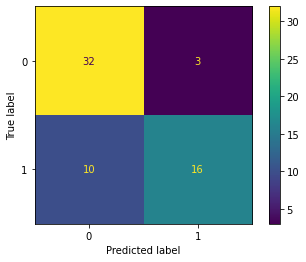

In [25]:
VC_base = VotingClassifier(estimators = estimator, voting = 'soft')
VC_base.fit(X_train, y_train)
y_pred_base = VC_base.predict(X_test)

VC_base_recall = recall_score(y_test, y_pred_base)
VC_base_precision = precision_score(y_test, y_pred_base)
VC_base_accuracy = accuracy_score(y_test, y_pred_base)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_base))
disp.plot()

In [26]:
print(f'Accuracy:  {VC_base_accuracy:.2f}')
print(f'Precision: {VC_base_precision:.2f}')
print(f'Recall:    {VC_base_recall:.2f}')

Accuracy:  0.79
Precision: 0.84
Recall:    0.62


##### K-Fold Cross-validation

In [27]:
from sklearn.model_selection import cross_validate
from statistics import stdev
base_scores = cross_validate(VC_base, X_train, y_train, cv=10, scoring=('accuracy', 'precision', 'recall'))

base_avg_accuracy        = base_scores['test_accuracy'].mean()
base_avg_precision       = base_scores['test_precision'].mean()
base_avg_recall          = base_scores['test_recall'].mean()
base_avg_accuracy_std    = stdev(base_scores['test_accuracy'])

print('Average Cross Validation Accuracy score: {}'.format(base_avg_accuracy))
print('Average Cross Validation Precision score: {}'.format(base_avg_precision))
print('Average Cross Validation Recall score: {}'.format(base_avg_recall))

Average Cross Validation Accuracy score: 0.8393333333333333
Average Cross Validation Precision score: 0.8570240870240872
Average Cross Validation Recall score: 0.8053030303030303


In [28]:
results1 = [(VC_base_accuracy, VC_base_precision, VC_base_recall, base_avg_accuracy, 
            base_avg_precision, base_avg_recall, base_avg_accuracy_std )]

VC_base_df = pd.DataFrame(data = results1, columns=
                        ['Accuracy','Precision','Recall','Avg CV Accuracy',
                         'Avg CV Precision', 'Avg CV Recall', 'Standard Deviation of CV Accuracy'])
VC_base_df.insert(0, 'Model', 'Base')

VC_base_df

,Model,Accuracy,Precision,Recall,Avg CV Accuracy,Avg CV Precision,Avg CV Recall,Standard Deviation of CV Accuracy
0,Base,0.786885,0.842105,0.615385,0.839333,0.857024,0.805303,0.060884


### Hyperparameter Optimization With Random Search For Each Individual Classifier<a id='section_7_4'></a>  

##### Random Search For Logistic Regression Classifier

In [29]:
from scipy.stats import loguniform, randint, uniform
from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import RandomizedSearchCV

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

model_lr = LogisticRegression()
lr_space = dict()
lr_space['solver']  = ['newton-cg', 'lbfgs', 'liblinear']
lr_space['penalty'] = ['none','l1', 'l2', 'elasticnet']
lr_space['C']       = loguniform(1e-5, 100)
search_lr = RandomizedSearchCV(model_lr, lr_space, n_iter=1000, scoring='accuracy', cv=cv, random_state=0)
result_lr = search_lr.fit(X_train, y_train)
print('Best Score: %s' % result_lr.best_score_)
print('Best Hyperparameters: %s' % result_lr.best_params_)

Best Score: 0.8553571428571429
Best Hyperparameters: {'C': 0.04304506877428992, 'penalty': 'l2', 'solver': 'lbfgs'}


##### Random Search For Support Vector Classifier

In [30]:
model_svc = SVC(probability=True)
svc_space = dict()
svc_space['C']      = loguniform(1e-5, 100)
svc_space['kernel'] = ['linear', 'rbf']
svc_space['gamma']  = loguniform(1e-5, 100)

search_svc = RandomizedSearchCV(model_svc, svc_space, n_iter=100, scoring='accuracy', cv=cv, random_state=0)
result_svc = search_svc.fit(X_train, y_train)
print('Best Score: %s' % result_svc.best_score_)
print('Best Hyperparameters: %s' % result_svc.best_params_)

Best Score: 0.8526643990929705
Best Hyperparameters: {'C': 85.58006889625479, 'gamma': 0.00032982144554896285, 'kernel': 'rbf'}


##### Random Search For Random Forest Classifier

In [31]:
model_rfc = RandomForestClassifier()
rfc_space = dict()
rfc_space['n_estimators']      = randint(15,50)
rfc_space['criterion']         = ['gini', 'entropy', 'log_loss']
rfc_space['max_depth']         = randint(2,20)
rfc_space['max_features']      = ['sqrt', 'auto'] 
rfc_space['min_samples_split'] = [2, 5, 10]
rfc_space['min_samples_leaf']  = [1, 2, 4]
rfc_space['bootstrap']         = [True, False]
search_rfc = RandomizedSearchCV(model_rfc, rfc_space, n_iter=100, scoring='accuracy', cv=cv, random_state=0)
result_rfc = search_rfc.fit(X_train, y_train)
print('Best Score: %s' % result_rfc.best_score_)
print('Best Hyperparameters: %s' % result_rfc.best_params_)

Best Score: 0.8358276643990928
Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 43}


##### Random Search For K-Nearest Neighborhood

In [32]:
model_knn = KNeighborsClassifier()
knn_space = dict()
knn_space['n_neighbors'] = randint(1,33)
knn_space['weights']     = ["uniform", "distance"]
knn_space['algorithm']   = ["ball_tree", "kd_tree", "brute"]
knn_space['leaf_size']   = randint(1,1000) 
knn_space['p']           = [1,2]
search_knn = RandomizedSearchCV(model_knn, knn_space, n_iter=1000, scoring='accuracy', cv=cv, random_state=0)
result_knn = search_knn.fit(X_train, y_train)
print('Best Score: %s' % result_knn.best_score_)
print('Best Hyperparameters: %s' % result_knn.best_params_)

Best Score: 0.8566043083900227
Best Hyperparameters: {'algorithm': 'brute', 'leaf_size': 708, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


##### Random Search For Adaboost

In [33]:
model_adb = AdaBoostClassifier()
adb_space = dict()
adb_space['n_estimators']  = randint(50,100)
adb_space['learning_rate'] = loguniform(1e-5, 100)
adb_space['algorithm']     = ["SAMME", "SAMME.R"]
search_adb = RandomizedSearchCV(model_adb, adb_space, n_iter=100, scoring='accuracy', cv=cv, random_state=0)
result_adb = search_adb.fit(X_train, y_train)
print('Best Score: %s' % result_adb.best_score_)
print('Best Hyperparameters: %s' % result_adb.best_params_)

Best Score: 0.8278628117913832
Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.01837280264462446, 'n_estimators': 85}


##### Random Search For XGboost

In [34]:
model_xgb = XGBClassifier(objective = 'binary:logistic')
xgb_space = dict()
xgb_space['n_estimators']     = randint(20, 30)
xgb_space['learning_rate']    = uniform(0.005, 0.015)
xgb_space['subsample']        = uniform(0.3, 0.7)
xgb_space['max_depth']        = randint(5, 20)
xgb_space['colsample_bytree'] = uniform(0.4, 0.8)
xgb_space['colsample_bylevel']= uniform(0.4, 0.8)
xgb_space['colsample_bynode'] = uniform(0.3, 0.8)
xgb_space['min_child_weight'] = randint(1, 5)
xgb_space['booster']          = ["dart"]
xgb_space['reg_lambda']       = [2]
search_xgb = RandomizedSearchCV(model_xgb, xgb_space, n_iter=100, scoring='accuracy', cv=cv, random_state=0)
result_xgb = search_xgb.fit(X_train, y_train)
print('Best Score: %s' % result_xgb.best_score_)
print('Best Hyperparameters: %s' % result_xgb.best_params_)

Best Score: 0.8441043083900228
Best Hyperparameters: {'booster': 'dart', 'colsample_bylevel': 0.6593128062345712, 'colsample_bynode': 0.41973989374694654, 'colsample_bytree': 0.5778571106012702, 'learning_rate': 0.01079733471688793, 'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 28, 'reg_lambda': 2, 'subsample': 0.9316440082217889}


In [35]:
model_lr  = model_lr.set_params(**search_lr.best_params_)
model_rfc = model_rfc.set_params(**search_rfc.best_params_)
model_svc = model_svc.set_params(**search_svc.best_params_)
model_knn = model_knn.set_params(**search_knn.best_params_)
model_adb = model_adb.set_params(**search_adb.best_params_)
model_xgb = model_xgb.set_params(**search_xgb.best_params_)

#####  Adaptive Boosting Feature Importance

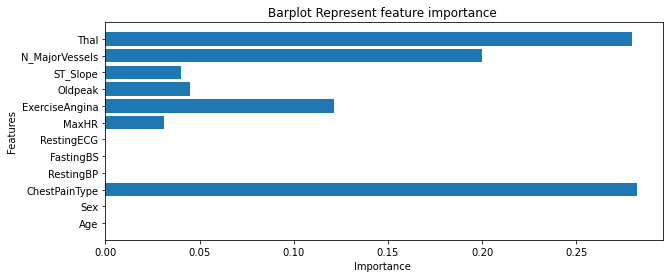

In [36]:
model_adb.fit(X_train,y_train)
f_imp = pd.DataFrame({'Feature': ["Age", "Sex", "ChestPainType", "RestingBP", "FastingBS", "RestingECG",
                               "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "N_MajorVessels", "Thal"], 
                            'Importance': model_adb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Barplot Represent feature importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.barh(f_imp['Feature'],f_imp['Importance'])
plt.show()

##### Random Forest Classifier Feature Importance

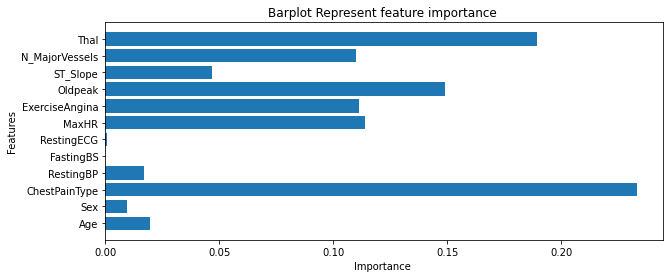

In [37]:
model_rfc.fit(X_train,y_train)
f_imp = pd.DataFrame({'Feature': ["Age", "Sex", "ChestPainType", "RestingBP", "FastingBS", "RestingECG",
                               "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "N_MajorVessels", "Thal"], 
                            'Importance': model_rfc.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Barplot Represent feature importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.barh(f_imp['Feature'],f_imp['Importance'])
plt.show()

##### Extreme Gradient Boosting Feature Importance

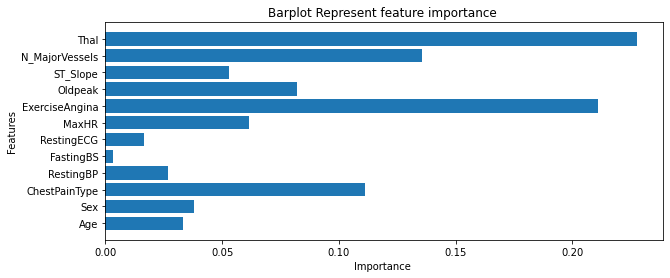

In [38]:
model_xgb.fit(X_train,y_train)
f_imp = pd.DataFrame({'Feature': ["Age", "Sex", "ChestPainType", "RestingBP", "FastingBS", "RestingECG",
                               "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "N_MajorVessels", "Thal"], 
                            'Importance': model_xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Barplot Represent feature importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
plt.barh(f_imp['Feature'],f_imp['Importance'])
plt.show()

### Tuned Model With Voting Classifier<a id='section_7_5'></a>

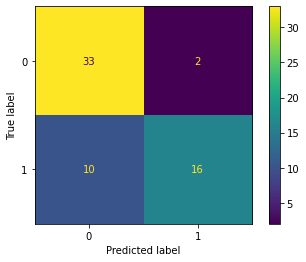

In [39]:
tuned_estimator = [('LogisticRegression', model_lr), ('RandomForest', model_rfc), 
             ('SVC', model_svc), ('KNN', model_knn),
             ('AdaBoostClassifier', model_adb), ('XGB', model_xgb)]

VC_tuned = VotingClassifier(estimators = tuned_estimator, voting = 'soft')
VC_tuned.fit(X_train, y_train)
y_pred_tuned = VC_tuned.predict(X_test)

VC_tuned_recall = recall_score(y_test, y_pred_tuned)
VC_tuned_precision = precision_score(y_test, y_pred_tuned)
VC_tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tuned))
disp.plot()

In [40]:
print(f'Accuracy:  {VC_tuned_accuracy:.2f}')
print(f'Precision: {VC_tuned_precision:.2f}')
print(f'Recall:    {VC_tuned_recall:.2f}')

Accuracy:  0.80
Precision: 0.89
Recall:    0.62


##### K-Fold Cross-validation

In [41]:
tuned_scores = cross_validate(VC_tuned, X_train, y_train, cv=10, scoring=('accuracy', 'precision', 'recall'))

tuned_avg_accuracy     = tuned_scores['test_accuracy'].mean()
tuned_avg_precision    = tuned_scores['test_precision'].mean()
tuned_avg_recall       = tuned_scores['test_recall'].mean()
tuned_avg_accuracy_std = stdev(base_scores['test_accuracy'])

print('Average Cross Validation Accuracy score: {}'.format(tuned_avg_accuracy))
print('Average Cross Validation Precision score: {}'.format(tuned_avg_precision))
print('Average Cross Validation Recall score: {}'.format(tuned_avg_recall))

Average Cross Validation Accuracy score: 0.8558333333333333
Average Cross Validation Precision score: 0.8816161616161615
Average Cross Validation Recall score: 0.8143939393939394


In [42]:
results2 = [(VC_tuned_accuracy, VC_tuned_precision, VC_tuned_recall, tuned_avg_accuracy, 
            tuned_avg_precision, tuned_avg_recall, tuned_avg_accuracy_std )]

VC_tuned_df = pd.DataFrame(data = results2, columns=
                        ['Accuracy','Precision','Recall','Avg CV Accuracy',
                         'Avg CV Precision', 'Avg CV Recall','Standard Deviation of CV Accuracy'])
VC_tuned_df.insert(0, 'Model', 'Tuned')

VC_tuned_df

,Model,Accuracy,Precision,Recall,Avg CV Accuracy,Avg CV Precision,Avg CV Recall,Standard Deviation of CV Accuracy
0,Tuned,0.803279,0.888889,0.615385,0.855833,0.881616,0.814394,0.060884


### Accuracy Report For The Tuned Classifiers<a id='section_7_6'></a>

In [43]:
evaluation = pd.DataFrame({'Model': ['Logistic Regression','Support Vector Classifier',
                                     'Random Forest Classifier','K-Nearest Neighbour',
                                     'AdaBoost', 'XGBoost'], 
                           'Accuracy': [result_lr.best_score_*100,
                                        result_svc.best_score_*100,
                                        result_rfc.best_score_*100,
                                        result_knn.best_score_*100,
                                        result_adb.best_score_*100,
                                        result_xgb.best_score_*100]})                                                                          
evaluation

,Model,Accuracy
0,Logistic Regression,85.535714
1,Support Vector Classifier,85.266440
2,Random Forest Classifier,83.582766
3,K-Nearest Neighbour,85.660431
4,AdaBoost,82.786281
5,XGBoost,84.410431


### Base and Tuned Model Classification Report<a id='section_7_7'></a>

In [44]:
models = pd.concat([VC_base_df, VC_tuned_df], ignore_index=True, sort=False)
models

,Model,Accuracy,Precision,Recall,Avg CV Accuracy,Avg CV Precision,Avg CV Recall,Standard Deviation of CV Accuracy
0,Base,0.786885,0.842105,0.615385,0.839333,0.857024,0.805303,0.060884
1,Tuned,0.803279,0.888889,0.615385,0.855833,0.881616,0.814394,0.060884


### Benchmark Models Comparison<a id='section_7_8'></a>

In [45]:
models_comp = pd.DataFrame({'Model': ['Our Tuned Model','Bhat Model', 
                                      'Rutecki Hard Voting Model','Rutecki Soft Voting Model'], 
                           'Accuracy': [tuned_avg_accuracy,0.918,0.897,.908],
                           'Precision': [tuned_avg_precision,0.914,0.896,0.914],
                           'Recall': [tuned_avg_recall,0.941,0.920,0.920]
                           })
models_comp

,Model,Accuracy,Precision,Recall
0,Our Tuned Model,0.855833,0.881616,0.814394
1,Bhat Model,0.918000,0.914000,0.941000
2,Rutecki Hard Voting Model,0.897000,0.896000,0.920000
3,Rutecki Soft Voting Model,0.908000,0.914000,0.920000


### Hypothesis Testing<a id='section_7_9'></a>

In [46]:
from scipy import stats

popmean_accuracy  = .907
popmean_precision = .908 
popmean_recall    = .927
popmean = [popmean_accuracy,popmean_precision,popmean_recall]
sample  = [tuned_scores['test_accuracy'],tuned_scores['test_precision'],tuned_scores['test_recall']]

print("P-Value Accuracy   : {}".format(stats.ttest_1samp(sample[0], popmean[0]).pvalue))
print("P-Value Precision  : {}".format(stats.ttest_1samp(sample[1], popmean[1]).pvalue))
print("P-Value Recall     : {}".format(stats.ttest_1samp(sample[2], popmean[2]).pvalue))

P-Value Accuracy   : 0.024741311172758913
P-Value Precision  : 0.41520108990052285
P-Value Recall     : 0.0013395367856403417


Our model produces lower scores against the benchmark models on all three metrics. 

With significance level of 0.05, we reject the null hypothesises that our model yields similar accuracy and recall scores, while keeping the null hypothesis that our model yields similar precision score.

## Discussion<a id='section8'></a>

### Interpreting the result<a id='section_8_1'></a>
      
The results of our study have shown that contrary to our initial expectations, the model we developed performs worse than the benchmark models. We hypothesized that by removing the cholesterol variable from the model, performance scores of our model should be similar to that of the benchmark models. Our findings indicate that the exclusion of the cholesterol variable negatively impacts the accuracy and recall scores. This suggests that the model's ability to correctly identify and classify all positive cases was compromised without this variable. One possible explanation for this unexpected outcome is that the cholesterol variable plays an important role in predicting presence of heart disease in patients than we initially assumed. Our model may have failed to capture this relationship due to the exclusion of the cholesterol variable. The precision score, however, remained unaffected. This may be due to the fact that precision is only concerned with the true positive cases out of the total positive cases predicted by the model. 

A possible reason for the poor performance of our model could be attributed to the selection of the variables used in the model and hyperparameter optimization process. For the reasons discussed above, we decided to choose the same variables that all published ML papers have used so that we can compare the performance between models. We may have overlooked some important variables or failed to include other variables that could be highly correlated with predicting presence of heart disease in patients. Moreover, we might not have obtained the best optimal set of hyperparameters for the individual classifier due to time constraint of this project.  


### Limitations<a id='section_8_2'></a>

There are several limitations to this study that should be considered when interpreting the results. First, our sample size was relatively small, which may have limited the generalizability of our findings. A larger sample size may have provided more accurate and reliable results.

Second, our model was trained on a specific dataset and may not be applicable to other datasets with different variables. This may limit the usefulness of our model in real-world applications.

Third, for the three hypothesis tests, we assumed the population means of the accuracy, precision, and recall based on averages of the scores obtained from the benchmark models. The authors might also have made serveral modifications to the dataset to achieve such high scores compared to the baseline performance posted on UCI archive. 

Finally, we only considered the impact of one variable (cholesterol) on the performance of our model while keeping all other variables. Including more variables to our study may have an different impact on the model's performance.

### Ethics & Privacy<a id='section_8_3'></a>

Studying heart disease datasets may raise several ethical issues that need to be addressed to ensure that the research is conducted in a responsible and ethical manner. Some of the ethical issues that may arise in studying heart disease datasets are:

- Informed consent: The issue of informed consent arises when researchers collect and use patient data without their knowledge or permission. Researchers should obtain informed consent from patients before collecting and using their data.

- Confidentiality and privacy: Patient data should be kept confidential and private to protect their privacy. Researchers should take appropriate measures to ensure that patient data is not disclosed or shared with unauthorized persons.

- Data bias: There is a risk of data bias when datasets are not representative of the population being studied. Researchers should ensure that datasets are diverse and representative to avoid biases.

- Data ownership: Ownership of the data is an important issue when studying heart disease datasets. Researchers should respect the ownership rights of the patients and the institutions that provided the data.

- Data security: There is a risk of data breaches when working with large datasets. Researchers should take appropriate measures to ensure the security of the data and prevent unauthorized access.

- Data accuracy and validity: The accuracy and validity of the data are important for drawing reliable conclusions from the research. Researchers should ensure that the data is accurate and valid and that any errors or discrepancies are corrected.

- Fair distribution of benefits: The benefits of the research should be fairly distributed among all parties involved. Patients should be informed about the benefits and risks of the research, and their rights should be protected. Researchers should ensure that the benefits of the research are distributed fairly among all parties involved.

Addressing these ethical issues is critical for conducting responsible and ethical research on heart disease datasets to ensure that the models are fair and unbiased. Without detailed information about the data collection process, it is difficult to determine whether the UCI archive heart disease dataset meets all ethical concerns. However, we know that the dataset comprises observations from four databases: Cleveland, Hungary, Switzerland, and the VA Long Beach  and the names and social security numbers of the patients were removed from the database and replaced with dummy values, thus we can be sure that confidentiality and privacy are guaranteed. Second, the dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license, which means that the dataset can be shared and modified for any use, as long as proper credit is provided. In addition, we double checked that the attributes and entries of the downloaded data matched the description provided on the UCI archive website. The measures that were taken demonstrates our commitment to ensuring that the dataset used in our project fulfills all the potential ethical concerns that were mentioned.

### Conclusion<a id='section_8_4'></a>

In conclusion, our findings have shown that excluding the cholesterol variable from the model has a negative impact on model performance in predicting presence of heart disease in patients. Further studies are needed to identify the reasons for this and explore possible solutions to improve the accuracy and recall scores of the model. A possible approach could be to explore other variables that may improve the performance of the model. It is also beneficial to further investigate to find a better set of hyperparameters for each of the individual classifier used in our ensemble classifier.

## Footnotes<a id='section9'></a>
<a name="clarknote"></a> 1.[^](#clark): Clark LT (1986). Cholesterol and heart disease: current concepts in pathogenesis and treatment. J Natl Med Assoc. 1986 Aug;78(8):743-51. PMID: 3531531; PMCID: PMC2571342. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2571342/<br> 

<a name="dongnote"></a> 2.[^](#dong): Dong T, et al. (2020). The effects of low-carbohydrate diets on cardiovascular risk factors: A meta-analysis. PLoS One. 2020 Jan 14;15(1):e0225348. doi: 10.1371/journal.pone.0225348. PMID: 31935216; PMCID: PMC6959586. https://pubmed.ncbi.nlm.nih.gov/31935216/<br>

<a name="wikinote"></a> 3.[^](#wikipedia): Wikipedia (2023). Replication crisis. Wikipedia. Available at: https://en.wikipedia.org/wiki/Replication_crisis#References (Accessed: March 3, 2023)<br>

<a name="ioannidisjpda"></a> 4.[^](#ioannidis): Ioannidis JPA (2005). Why Most Published Research Findings Are False. PLOS Medicine 2(8): e124. https://doi.org/10.1371/journal.pmed.0020124<br>

<a name="solimannote"></a> 5.[^](#soliman): Soliman GA (2018). Dietary Cholesterol and the Lack of Evidence in Cardiovascular Disease. Nutrients. 2018 Jun 16;10(6):780. doi: 10.3390/nu10060780. PMID: 29914176; PMCID: PMC6024687. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6024687/<br> 

<a name="rcsinote"></a> 6.[^](#rcsi): ScienceDaily (2022). Link between high cholesterol and heart disease 'inconsistent', new study finds (2022) ScienceDaily. Available at: https://www.sciencedaily.com/releases/2022/03/220314120702.htm (Accessed: March 3, 2023)<br> 

<a name="Bhatnote"></a> 7.[^](#Bhat): Bhat N. EDA+Classification+Ensemble ~ 92% Accuracy. Kaggle. Available at: https://www.kaggle.com/code/nareshbhat/eda-classification-ensemble-92-accuracy/notebook (Accessed: March 6, 2023)<br>

<a name="Ruteckinote"></a> 8.[^](#Rutecki): Rutecki M. Voting Classifier for Better Results. Kaggle. Available at: https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results#4.-Model-selection (Accessed: March 6, 2023)<br>

<a name="Duanote"></a>9.[^](#Dua): Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. Available at: https://archive-beta.ics.uci.edu/dataset/45/heart+disease. Irvine, CA: University of California, School of Information and Computer Science.
